### In this project, I am going to be working with a hotel booking dataset which contains booking information for 2 Hotels: City Hotel, Resort Hotel. The dataset includes information reservation date, length of stay, number of adults, cancellation status etc.

### Let us explore and analyze the factors that help the hotels make an informed decision to improve the revenue and decrease cancellations.

### Importing Libraries

In [108]:
# Importing all import python libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the dataset

In [13]:
df = pd.read_csv('hotel_booking.csv')

### Exploratory Data Analysis & Data Cleaning

In [14]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [15]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [16]:
df.shape

(119390, 32)

In [17]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [18]:
df1 = df.copy()

Let us look at the non-numeric (object datatype) columns and understand how many unique values they contain.

In [43]:
df1.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


Let us now look at the information in these columns

In [41]:
for col in df1.describe(include = 'object').columns:
    print(col)
    print(df1[col].unique())
    print('*'*70)

hotel
['Resort Hotel' 'City Hotel']
**********************************************************************
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
**********************************************************************
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
**********************************************************************
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LK

## Cleaning Data

Cleaning involves the following steps:
1. Remove duplicates
2. Remove missing values
3. Change datatypes of columns
4. Remove unwanted columns

Let us look at the datatypes of the columns, and see if there any which need to be changed

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Converting the column 'reservation_status_date' datatype to datetime

In [37]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'])

In [93]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118897 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64

Checking for null values in the columns

In [98]:
df1.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
total_stay                        0
reservation_status_date           0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

Looks like there are 4 columns with null values namely: company, agent, country, children.
We won't be using company and agent column, so we will drop these 2 columns.

In [52]:
df1.drop(['company', 'agent'], axis = 1, inplace = True)
df1.dropna(inplace = True)

Adding column 'total stay'.
We are adding this column so that we can analyse the stay length at hotels.

In [57]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

EDA

Let's first find the correlation between the numerical data.

In [59]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay']]

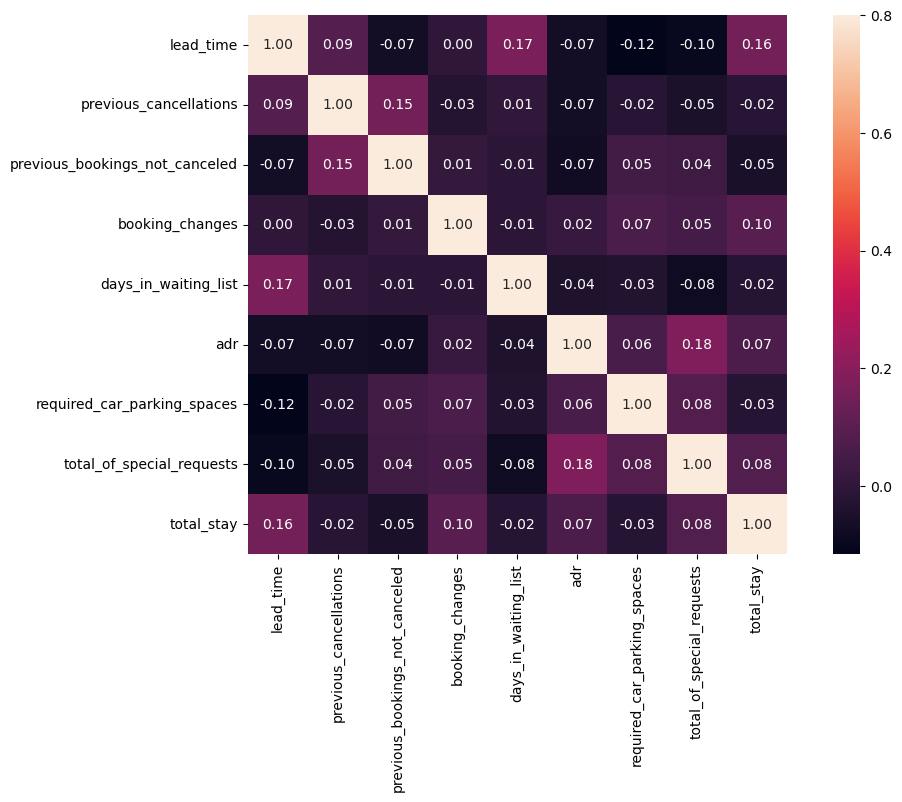

In [60]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan well in advance before the actual arrival.

In [58]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,3.431062
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,2.544939
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,3.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,57.000000


Seems like 'adr' column has a max value of 5400 which seems to be an outlier. Let us plot this and see if it an outlier.

<AxesSubplot:>

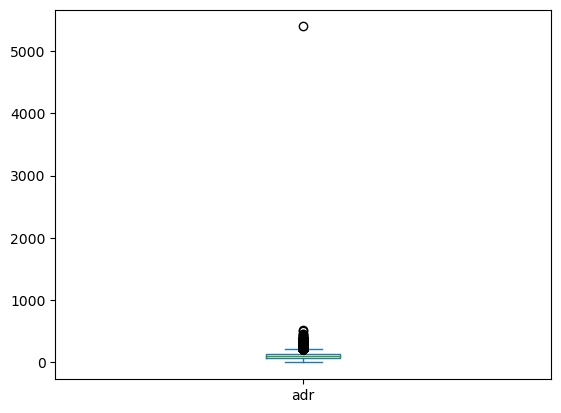

In [55]:
df1['adr'].plot(kind='box')

It defintely is an outlier, so we will remove it.

In [61]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

Let us now plot a scatter plot to see if the lenght of stays affects adr.

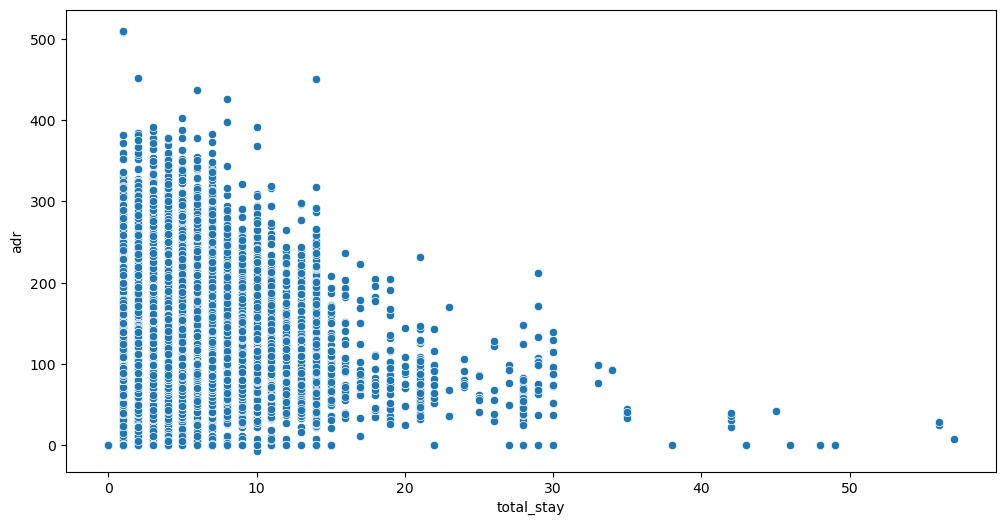

In [62]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

From the scatter plot we can see that as length of total_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

### Data Analysis & Visualizations:
Hotel wise Analysis

Chceking Percentage cancellations for both hotels

In [72]:
cancel_percent = df1['is_canceled'].value_counts(normalize = True)
cancel_percent

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

37% cancellations of total bookings is huge. We need to explore this further.

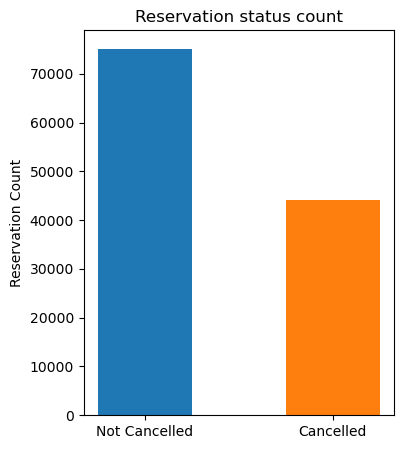

In [73]:
cancel_count = df1['is_canceled'].value_counts()
cancel_count

# value_counts() - returns the column and how many times(count) the value is present in the column
# normalizae = True returns value in percentage

# plt.figure(figsize = (2.5,5))
# plt.title('Reservation status count')
# plt.bar(['Not Cancelled', 'Cancelled'],df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.4)
# plt.set_color(['red', 'blue'])
# plt.show()


fig, ax = plt.subplots(1, 1, figsize=(4, 5))

status = ['Not Cancelled', 'Cancelled']
counts = cancel_count
bar_labels = ['Not Cancelled', 'Cancelled']
bar_colors = ['tab:blue', 'tab:orange']
width = 0.5

ax.bar(status, counts, label=bar_labels, color=bar_colors, width = width)

ax.set_ylabel('Reservation Count')
ax.set_title('Reservation status count')

plt.show()

Let us look at the cancellations and compare the two hotels

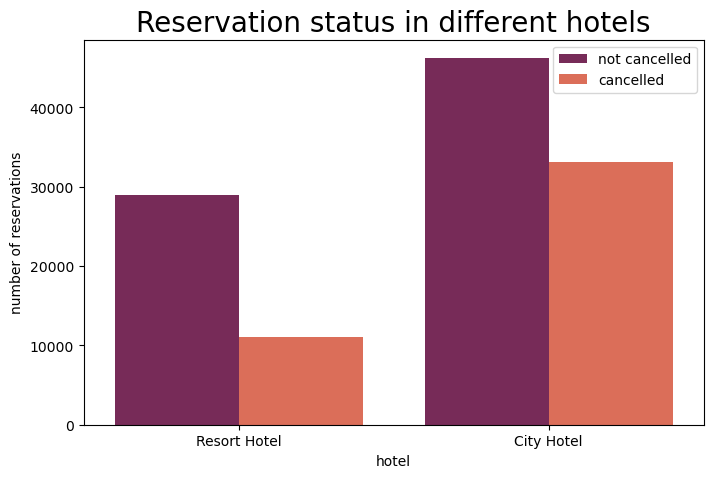

In [71]:
plt.figure(figsize = (8,5))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df1, palette = 'rocket')
legend_labels = ax1.get_legend_handles_labels()
# ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not cancelled', 'cancelled'])
plt.show()

Looking at cancellations in Resort Hotel

In [75]:
resort_hotel = df1[df1['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

Now, looking at cancellations in City Hotel

In [74]:
city_hotel = df1[df1['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

Seems like City Hotel has nearly 42% cancellations, which is alot. Let us explore the reason for this.

In [76]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

Let us check the average adr across the hotels over the years

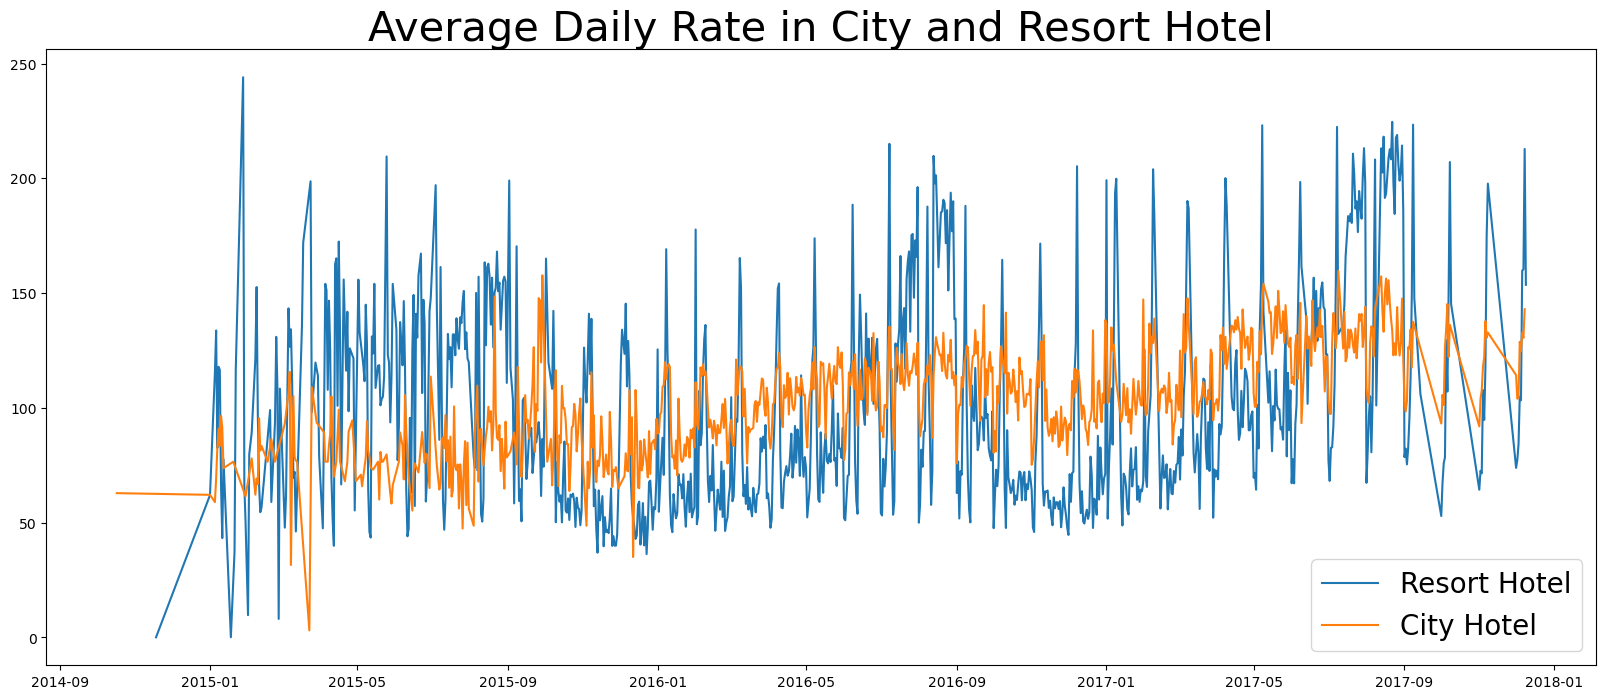

In [78]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

In [80]:
df1['month'] = df1['reservation_status_date'].dt.month

Chceking Rservation status per Month

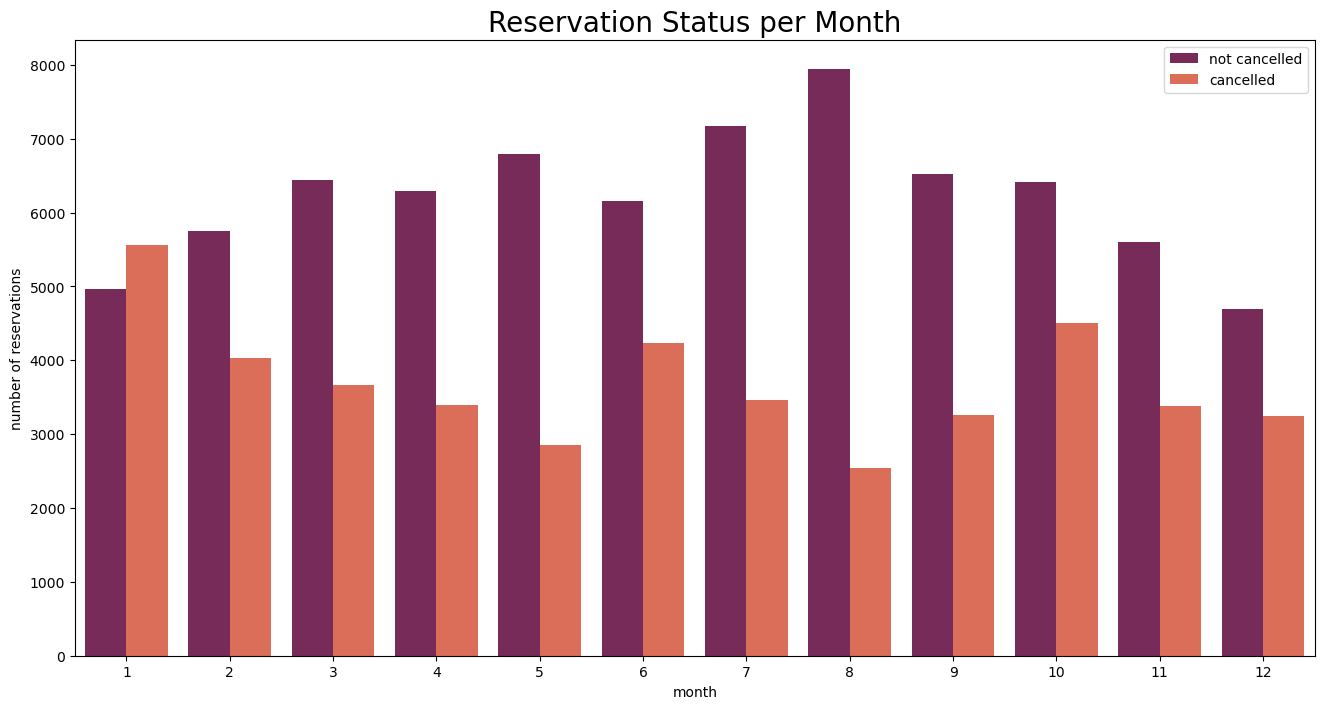

In [81]:
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df1, palette = 'rocket')
legend_labels = ax1.get_legend_handles_labels()
# ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation Status per Month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not cancelled', 'cancelled'])
plt.show()

We can observe that the reservations are highest in August and the cancellations lowest and vice-versa in January (more cancellations and less bookings).
Let us check the reason for this:
Is ADR affecting this? Let us plot and see.

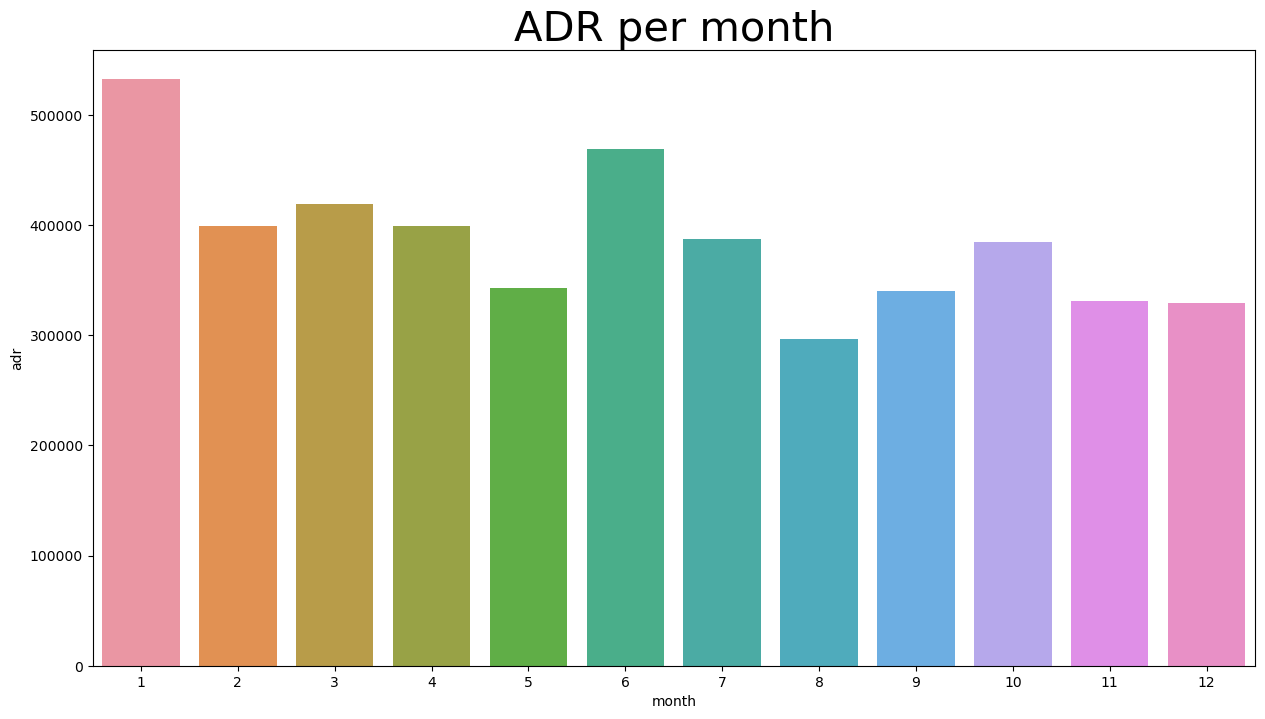

In [83]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot('month', 'adr', data = df1[df1['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index()) 
plt.show()

Looking at the plot, we can clearly notice that the ADR is highest in January, meaning it could be cause for high number of cancellations.

Let us look now at the top 10 country data for cancellations.

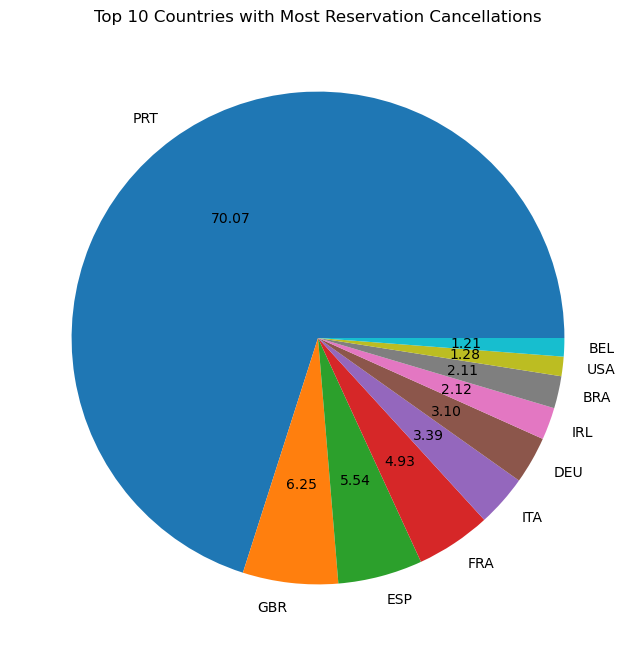

In [100]:
cancelled_data = df1[df1['is_canceled'] == 1]
top_10_countries = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 Countries with Most Reservation Cancellations')
plt.pie(top_10_countries, autopct = '%.2f', labels = top_10_countries.index)
plt.show()

Seems like, Portugal accounts for about 70% of the total cancellations. 

Looking at other factors that could be contributing to the cancellations.

In [101]:
df1['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [102]:
df1['market_segment'].value_counts(normalize = True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [103]:
cancelled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

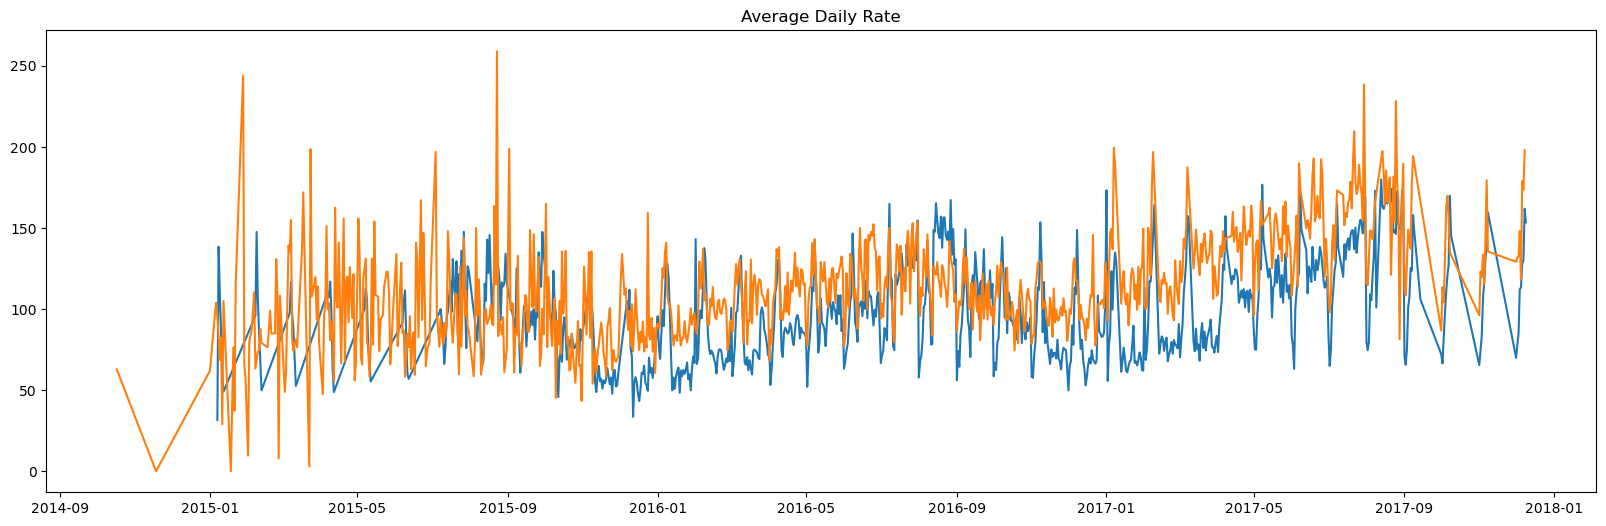

In [104]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = df1[df1['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.show()

There is not alot of data for 2015 and post 2017. So we can filter it out.

In [105]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date'] < '2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date'] < '2017-09')]

Let us see if ADR is affecting cancellations.

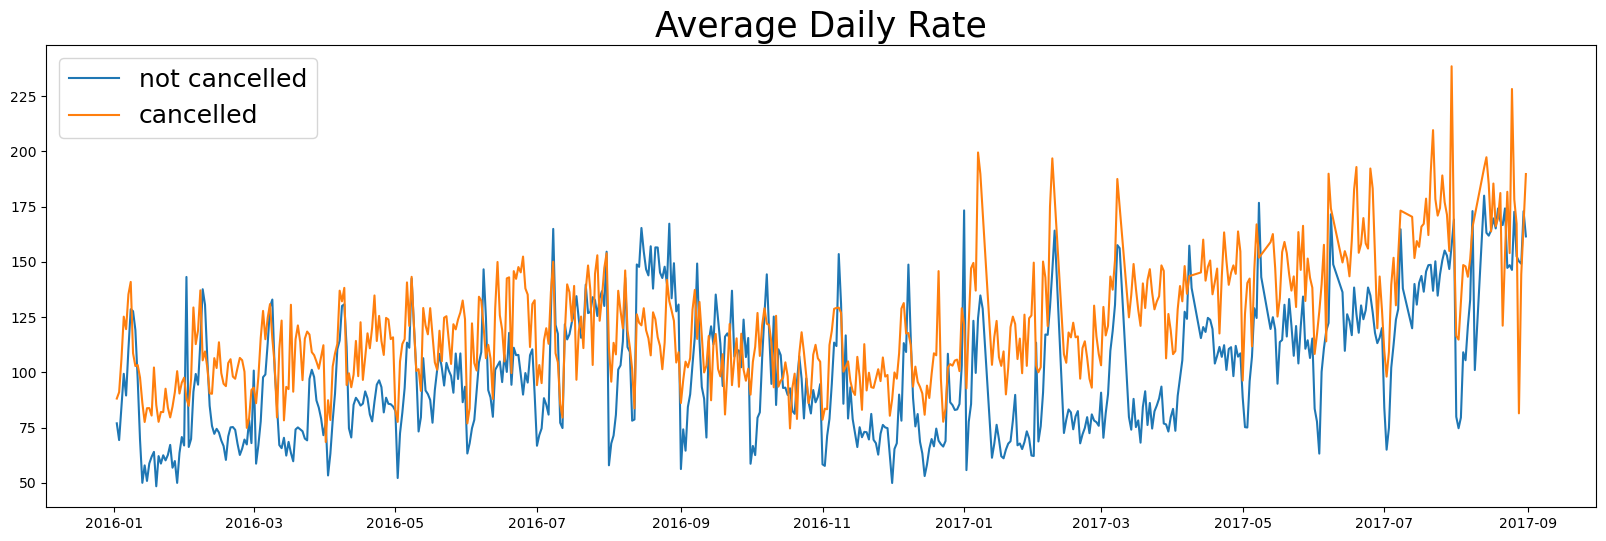

In [107]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 25)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 18)
plt.show()

Seems like ADR is affecting cancellations. Higher the ADR, higher the cancellations.

##Conclusion/Suggestions:

1. City Hotel has 42% cancellations. They need to improve the facilities at the hotel, try group discounts, promotions on long weekends/holidays to attract more people.
2. People coming from Portugal have over 70% cancellations. The hotel needs to conduct customer surveys/feedback to understand the reasons for cancellations.
3. ADR affects cancellation. The hotels need to address by providing discounts to customers with longer stays, keep prices competitive, offer better facilities to retain customers.